In [2]:
from load_data_noin import load_data
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='EARTH_T42'#FiducialPlanet/PostSurf/RESTART/'#NewOutModel4/'
#runname='FiducialPlanet/Model4/L10/T42/P0_001/'
oom=0
surfp=1.0
LastOrbit_=False
OLR_=False

verbose=True

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,runname,oom,surfp,LastOrbit_,OLR_,verbose,'fort.26')


  
 ....reading  fort.26
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
 
--------------------------
|    ARRAY DIMENSIONS    |
--------------------------
N_levels:  30
N_lons:    128
N_lats:    64
N_params:  6
 
PRESSURE ARRAY: 
[0.03225806 0.06451613 0.09677419 0.12903226 0.16129032 0.19354839
 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871 0.38709677
 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871  0.58064516
 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548 0.77419355
 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387 0.96774194]
 
LATITUDE ARRAY: 
[ 87.86399841  85.09700012  82.31300354  79.52600098  76.73699951
  73.94799805  71.15799713  68.36799622  65.57800293  62.78699875
  59.99700165  57.20700073  54.41600037  51.62599945  48.83499908
  46.04499817  43.25400162  40.4640007   37.67300034  34.88299942
  32.09199905  29.3010006   26.51099968  23.71999931  20.93000031
  18.13899994  15.34799957  12.55799961   9.76710033   6.97650003
   4.1

# ----------------------------------
#  Temperature Contour Plots 

/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/EARTH_T42/TEMPS29.png
-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  256.3500061035156 255.0
Max Temp [K], Plot limit:  322.29998779296875 323.0
-------------------------------------------------------


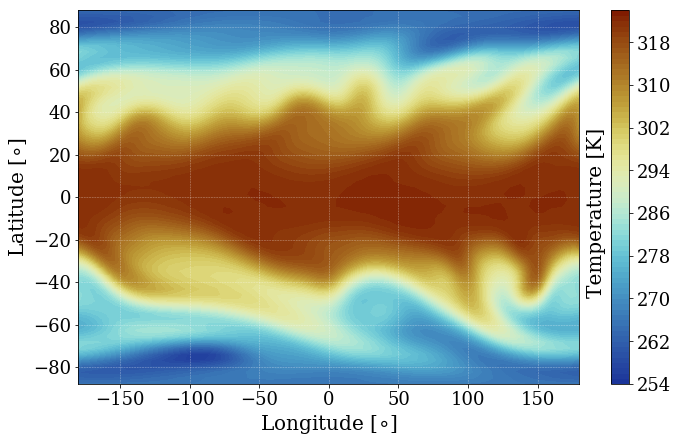

In [7]:
from igcm_func import igcm_Plot

lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=1.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

caption=False   #set equal to true to have a caption
cap='P=6.909 days'  #caption in top right

ortho=False #orthographic projection
latcenter=0.0       #center of plot in degrees
loncenter=0.0

freeze=False         #adds a black line at water freezing temperature,useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''

if plot<4:
    savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.png'
else:
    savename=path+runname+'/'+ptype+pstyle+'.pdf'
print savename

ver=True           #verbose output, PLOTS AND TEXT

cbarL=255 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=323 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False,True)

# -------------------------------------
# Longitudinally Averaged Plots #

4 5


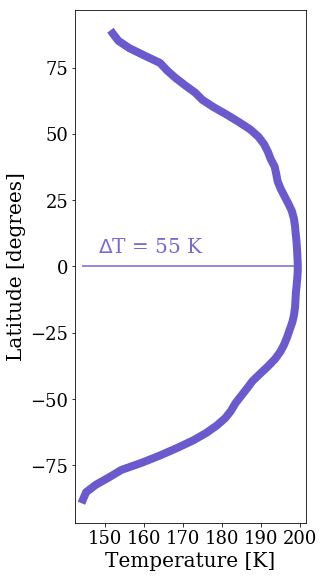

In [14]:
from igcm_func import lon_avg

savepath='Files/'+runname
lev=4
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=False            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

noy=False  #don't plot y labels

%matplotlib inline

test=lon_avg(plot,savepath,data_26,lon_arr,lat_arr,lev,lo,ln,tn,noy)


In [1]:
from igcm_func import lon_avg_comp

runnames=['P0_001','P0_005','P0_010','P0_015','P0_020']
ooms=[0,0,0,0,0]
p0s=[0.01,0.05,0.10,0.15,0.20]
labels=['0.01 bar','0.05 bar','0.10 bar','0.15 bar','0.20 bar']

path='Files/FiducialPlanet/Model4/L10/T42/'
pres_plot=0.2  #currently LW photosphere
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=True            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.73 #top point of line labels (in 0-1)

%matplotlib inline
test=lon_avg_comp(path,plot,pres_plot,lo,ln,tn,runnames,ooms,p0s,labels)



#L0=True doesn't work right now, fix!!


------ P0_001 ------
 DOING LAST ORBIT AVERAGES....
  
 ....reading  fort.2600
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
closest level to  0.2  BARS is # 9
(64,)
  
 ....reading  fort.2601
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(2, 64)
  
 ....reading  fort.2602
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(3, 64)
  
 ....reading  fort.2603
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(4, 64)
  
 ....reading  fort.2604
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(5, 64)
  
 ....reading  fort.2605
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(6, 64)
  
 ....reading  fort.2606
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(7, 64)
  
 ....reading  fort.2607
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(8, 64)
  
 ....reading  fort.2608
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(9, 64)
  
 ....reading  fort.2609
       nlat= 64 nlon= 128 nlev= 1

       END OF FILE: DONE
(85, 64)
  
 ....reading  fort.2685
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(86, 64)
  
 ....reading  fort.2686
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(87, 64)
  
 ....reading  fort.2687
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(88, 64)
  
 ....reading  fort.2688
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(89, 64)
  
 ....reading  fort.2689
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(90, 64)
-----------------


UnboundLocalError: local variable 'data_26' referenced before assignment

In [1]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from igcm_func import igcm_Plot

from load_data_noin import load_data

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='EARTH_T21/'#FiducialPlanet/PostSurf/RESTART/'#NewOutModel4/'
#runname='FiducialPlanet/Model4/L10/T42/P0_001/'
oom=0
surfp=0.01
LastOrbit_=False
OLR_=False

verbose=False


lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=2           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

freeze=False         #adds a black line at water freezing temperature, useful for earth
caption=False   #set equal to true to have a caption
cap='P=6.909 days'  #caption in top right

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
#savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

ver=False           #verbose output, PLOTS AND TEXT

cbarL=255#useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=323   #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

savepath=path+runname+'/LastOrb_F/'

for t in range(0,90):
    fort_file='fort.26'+str.zfill(str(int(t)),2)
    lo=False  #holder for last orbit
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,runname,oom,surfp,LastOrbit_,OLR_,verbose,fort_file)

    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,lo,False)
    print '....done'
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

  
 ....reading  fort.2600
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2601
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2602
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2603
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2604
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2605
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2606
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2607
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2608
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2609
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2610
       nlat= 32 nlon= 6

load_data_noin.py:106: RuntimeWarning: invalid value encountered in multiply
  sigma=np.empty([nlev])*0.0


....done
  
 ....reading  fort.2665
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2666
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2667
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2668
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2669
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2670
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2671
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2672
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2673
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2674
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2675
       nlat= 3

-------------------------------------------------------
Min UWind [mph], Plot limit:  -41.159729222357605 -234.0
Max UWind [mph], Plot limit:  229.30891402092143 235.0
-------------------------------------------------------
(30, 32)


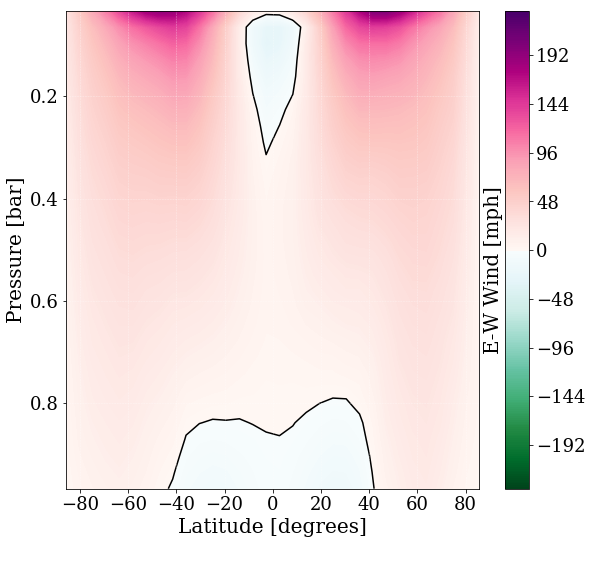

In [13]:
from press_Plot import press_Plot

plot=1              #0 to plot temps, 1 to plot E-W winds, 2=N-S winds. (USUALLY ONLY T AND E-W USED) 

longavg=True       #if True, longavg
long_pl=0.0         #if longavg=True, ignored, otherwise longitude to plot at

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

caption=True   #set equal to true to have a caption
cap='P=2.578 days'  #caption in top right
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0

zeros=True #draw a contour line at 0
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0


ver=True           #verbose output, PLOTS AND TEXT

cbarL=-105 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=105 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True      #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

lo=False            #if True, average of last orbit is used

savefig=True

##########################################################
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'


savename=path+runname+'/Pressure_'+ptype+runname
##########################################################


%matplotlib inline
press_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,units_a,units_t,units_w,freeze, caption, cap,
          savefig,savename,zeros,ver,cbarL,cbarM,cbar_even,ex,ncolors,longavg,long_pl,lo,oom)
